In [52]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [53]:
url = 'https://docs.google.com/document/d/e/2PACX-1vTER-wL5E8YC9pxDx43gk8eIds59GtUUk4nJo_ZWagbnrH0NFvMXIw6VWFLpf5tWTZIT9P9oLIoFJ6A/pub'

In [56]:
def create_img(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    tables = soup.find_all("table")
    table = tables[0]
    data = []
    for row in table.find_all("tr"):
        cols = row.find_all(["td", "th"])
        data.append([col.get_text(strip=True) for col in cols])
    
    df = pd.DataFrame(data[1:], columns=data[0])
    
    df['x-coordinate'] = pd.to_numeric(df['x-coordinate'], errors='coerce').astype('Int64')
    df['y-coordinate'] = pd.to_numeric(df['y-coordinate'], errors='coerce').astype('Int64')
    
    df_sorted = df.sort_values(by=['y-coordinate', 'x-coordinate'], ascending=[False, True]).reset_index(drop=True)
    
    pivot = df_sorted.pivot(index='y-coordinate', columns='x-coordinate', values='Character')
    pivot = pivot.sort_index(ascending=False)
    
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Draw grid
    ax.imshow([[0]*pivot.shape[1]]*pivot.shape[0], cmap='Greys', alpha=0.1)
    
    # Annotate each cell with the character
    for y in range(pivot.shape[0]):
        for x in range(pivot.shape[1]):
            char = pivot.iloc[y, x]
            if pd.notna(char):
                ax.text(x, y, char, ha='center', va='center', fontsize=5)
    
    # Set ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    # Make y-axis grow downward
    ax.invert_yaxis()
    plt.show()

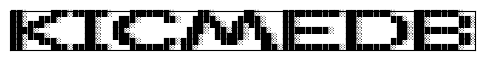

In [55]:
create_img(url)